In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/league-matches-4.csv')
df.head()

id  homeID  awayID  roundID  game_week   date_unix  btts_potential   
0  453873     149     108     3547          1  1533927600               0  \
1  453874     157      92     3547          1  1533987000               0   
2  453875     148     161     3547          1  1533996000               0   
3  453876     162     143     3547          1  1533996000               0   
4  453877     217     152     3547          1  1533996000               0   

   btts_fhg_potential  btts_2hg_potential  o45_potential  ...   
0                   0                   0              0  ...  \
1                   0                   0              0  ...   
2                   0                   0              0  ...   
3                   0                   0              0  ...   
4                   0                   0              0  ...   

   pre_match_teamB_overall_ppg  team_a_xg_prematch  team_b_xg_prematch   
0                          0.0                 0.0                 0.0  \
1                          0.0                 0.0                 0.0   
2                          0.0                 0.0                 0.0   
3                          0.0                 0.0                 0.0   
4                          0.0                 0.0                 0.0   

   total_xg_prematch     season    status   
0                0.0  2018/2019  complete  \
1                0.0  2018/2019  complete   
2                0.0  2018/2019  complete   
3                0.0  2018/2019  complete   
4                0.0  2018/2019  complete   

                                        stadium_name          home_name   
0                          Old Trafford (Manchester)  Manchester United  \
1              St. James' Park (Newcastle upon Tyne)   Newcastle United   
2             Vitality Stadium (Bournemouth, Dorset)    AFC Bournemouth   
3                            Craven Cottage (London)             Fulham   
4  John Smith's Stadium (Huddersfield, West Yorks...  Huddersfield Town   

           away_name  target  
0     Leicester City    home  
1  Tottenham Hotspur    away  
2       Cardiff City    home  
3     Crystal Palace    away  
4            Chelsea    away  

[5 rows x 111 columns]

In [3]:
df.dtypes.value_counts()

float64    75
int64      30
object      6
Name: count, dtype: int64

In [4]:
df.select_dtypes('object').columns

Index(['season', 'status', 'stadium_name', 'home_name', 'away_name', 'target'], dtype='object')

In [5]:
cats = np.load('data/cats.npy')
df[cats] = df[cats].astype(object)

In [6]:
df.dtypes.value_counts()

float64    75
int64      24
object     12
Name: count, dtype: int64

In [7]:
(df.select_dtypes('object').columns).difference(['target'])

Index(['awayID', 'away_name', 'coach_a_ID', 'coach_b_ID', 'homeID',
       'home_name', 'matches_completed_minimum', 'refereeID', 'season',
       'stadium_name', 'status'],
      dtype='object')

In [8]:
df.select_dtypes(include='object').columns.difference(['target'])

Index(['awayID', 'away_name', 'coach_a_ID', 'coach_b_ID', 'homeID',
       'home_name', 'matches_completed_minimum', 'refereeID', 'season',
       'stadium_name', 'status'],
      dtype='object')

In [9]:
df.select_dtypes('object').columns

Index(['homeID', 'awayID', 'matches_completed_minimum', 'refereeID',
       'coach_a_ID', 'coach_b_ID', 'season', 'status', 'stadium_name',
       'home_name', 'away_name', 'target'],
      dtype='object')

In [10]:
print(df.select_dtypes('object').iloc[:, 0].unique().shape)
df.select_dtypes('object').iloc[:, 0]

(27,)


0       149
1       157
2       148
3       162
4       217
       ... 
1808     92
1809    152
1810    108
1811    152
1812    223
Name: homeID, Length: 1813, dtype: object

In [11]:
pd.get_dummies(df.homeID, prefix='homeID')

homeID_59  homeID_92  homeID_93  homeID_108  homeID_142  homeID_143   
0         False      False      False       False       False       False  \
1         False      False      False       False       False       False   
2         False      False      False       False       False       False   
3         False      False      False       False       False       False   
4         False      False      False       False       False       False   
...         ...        ...        ...         ...         ...         ...   
1808      False       True      False       False       False       False   
1809      False      False      False       False       False       False   
1810      False      False      False        True       False       False   
1811      False      False      False       False       False       False   
1812      False      False      False       False       False       False   

      homeID_144  homeID_145  homeID_146  homeID_148  ...  homeID_159   
0          False       False       False       False  ...       False  \
1          False       False       False       False  ...       False   
2          False       False       False        True  ...       False   
3          False       False       False       False  ...       False   
4          False       False       False       False  ...       False   
...          ...         ...         ...         ...  ...         ...   
1808       False       False       False       False  ...       False   
1809       False       False       False       False  ...       False   
1810       False       False       False       False  ...       False   
1811       False       False       False       False  ...       False   
1812       False       False       False       False  ...       False   

      homeID_161  homeID_162  homeID_209  homeID_211  homeID_217  homeID_218   
0          False       False       False       False       False       False  \
1          False       False       False       False       False       False   
2          False       False       False       False       False       False   
3          False        True       False       False       False       False   
4          False       False       False       False        True       False   
...          ...         ...         ...         ...         ...         ...   
1808       False       False       False       False       False       False   
1809       False       False       False       False       False       False   
1810       False       False       False       False       False       False   
1811       False       False       False       False       False       False   
1812       False       False       False       False       False       False   

      homeID_222  homeID_223  homeID_251  
0          False       False       False  
1          False       False       False  
2          False       False       False  
3          False       False       False  
4          False       False       False  
...          ...         ...         ...  
1808       False       False       False  
1809       False       False       False  
1810       False       False       False  
1811       False       False       False  
1812       False        True       False  

[1813 rows x 27 columns]

In [12]:
print(df.select_dtypes('object').apply(lambda col: col.unique().shape))

   homeID  awayID  matches_completed_minimum  refereeID  coach_a_ID   
0      27      27                          4         30          71  \

   coach_b_ID  season  status  stadium_name  home_name  away_name  target  
0          70       5       1            29         27         27       3  


In [13]:
y = df['target']
X = df.drop(columns='target')

In [14]:
X.select_dtypes('object').columns

Index(['homeID', 'awayID', 'matches_completed_minimum', 'refereeID',
       'coach_a_ID', 'coach_b_ID', 'season', 'status', 'stadium_name',
       'home_name', 'away_name'],
      dtype='object')

In [15]:
X = pd.get_dummies(X, prefix=X.select_dtypes('object').columns)

In [36]:
df.target

0       home
1       away
2       home
3       away
4       away
        ... 
1808    home
1809    home
1810    away
1811    draw
1812    home
Name: target, Length: 1813, dtype: object

In [37]:
df['target'] = pd.factorize(df.target)[0]

In [45]:
df.target

0       0
1       1
2       0
3       1
4       1
       ..
1808    0
1809    0
1810    1
1811    2
1812    0
Name: target, Length: 1813, dtype: int64

In [1]:
df.select_dtypes('object').columns.shape

NameError: name 'df' is not defined

In [32]:
pd.get_dummies(df, prefix=df.select_dtypes('object').columns.difference(['target']))

ValueError: Length of 'prefix' (11) did not match the length of the columns being encoded (12).

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1)

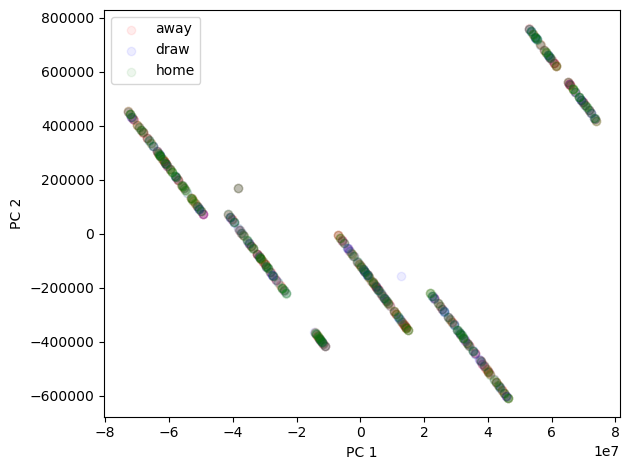

In [11]:
# PCA визуализация для данных
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
y_train_pca = y_train.values.ravel()

colors = ['r', 'b', 'g']
# markers = ['s', 'x']

for l, c in zip(np.unique(y_train_pca), colors):
    plt.scatter(X_train_pca[y_train_pca == l, 0],
                X_train_pca[y_train_pca == l, 1],
                c=c, label=l, alpha=0.07)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
print(y_train.value_counts(normalize=True))
print(y_valid.value_counts(normalize=True))

home    0.439294
away    0.344371
draw    0.216336
Name: target, dtype: float64
home    0.444934
away    0.314978
draw    0.240088
Name: target, dtype: float64


In [11]:
def roi_score(X_valid, y_valid, model):
    X_roi = X_valid[['odds_ft_1', 'odds_ft_x', 'odds_ft_2']].copy()
    X_roi['target_true'] = y_valid
    X_roi['target_pred'] = model.predict(X_valid)
    X_roi['coef'] = X_roi.loc[X_roi.target_true == X_roi.target_pred].apply(lambda row: row.odds_ft_1 if row.target_true == 'home' else
                                                                            row.odds_ft_x if row.target_true == 'draw' else
                                                                            row.odds_ft_2, axis=1)
    bet = 1
    successful_forecast = X_roi[X_roi.coef.notna()].shape[0]
    unsuccessful_forecast = X_roi[X_roi.coef.isna()].shape[0]
    coef_mean = X_roi[X_roi.coef.notna()].coef.mean()
    income_roi = successful_forecast * bet * coef_mean + unsuccessful_forecast * bet * 0
    investment_roi = (successful_forecast + unsuccessful_forecast) * bet
    print('roi:', (income_roi - investment_roi) / investment_roi)

In [250]:
# градиентный бустинг
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_gbclf = make_pipeline(StandardScaler(),
                           GradientBoostingClassifier(loss='log_loss', n_estimators=500, learning_rate=0.0203,
                                                      max_depth=5, random_state=0, verbose=1)
                          )
pipe_gbclf.fit(X_train, y_train.values)
print('acc: ', pipe_gbclf.score(X_valid, y_valid))

      Iter       Train Loss   Remaining Time 
         1           1.0475           56.41s
         2           1.0360           56.04s
         3           1.0244           56.51s
         4           1.0135           56.56s
         5           1.0027           56.44s
         6           0.9929           57.07s
         7           0.9828           56.85s
         8           0.9732           56.66s
         9           0.9636           56.53s
        10           0.9549           56.31s
        20           0.8762           54.59s
        30           0.8117           53.31s
        40           0.7581           52.08s
        50           0.7111           50.88s
        60           0.6741           49.62s
        70           0.6428           48.44s
        80           0.6163           47.21s
        90           0.5908           46.09s
       100           0.5684           44.87s
       200           0.4184           33.00s
       300           0.3235           21.83s
       40

In [251]:
roi_score(X_valid, y_valid, pipe_gbclf)

roi: 0.12121145374449355


In [252]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, pipe_gbclf.predict(X_valid).flatten()))

              precision    recall  f1-score   support

        away       0.53      0.65      0.58       143
        draw       0.33      0.12      0.18       109
        home       0.60      0.71      0.65       202

    accuracy                           0.55       454
   macro avg       0.49      0.49      0.47       454
weighted avg       0.51      0.55      0.51       454



In [226]:
from catboost import CatBoostClassifier

SEED = 1

params = {'loss_function': 'MultiClass',
          'eval_metric': 'Accuracy',
          # 'n_estimators': 6000, # 982
          'n_estimators': 60,
          'max_depth': 3,
          'eta': 0.6006,
        #   'cat_features': cat_features,
          'task_type': 'GPU',
          'verbose': 500,
          'random_seed': SEED
         }

cbc_3 = CatBoostClassifier(**params)
cbc_3.fit(X_train, y_train,
          eval_set=(X_valid, y_valid)
          )

0:	learn: 0.5584989	test: 0.5352423	best: 0.5352423 (0)	total: 8.36ms	remaining: 493ms
59:	learn: 0.7763061	test: 0.5770925	best: 0.5859031 (54)	total: 424ms	remaining: 0us
bestTest = 0.5859030837
bestIteration = 54
Shrink model to first 55 iterations.


In [227]:
roi_score(X_valid, y_valid, cbc_3)

roi: 0.22977973568281923


In [231]:
from catboost import CatBoostClassifier

SEED = 1

params = {'loss_function': 'MultiClass',
          'eval_metric': 'Accuracy',
          # 'n_estimators': 6000, # 982
          'n_estimators': 1000,
          'max_depth': 2,
          'eta': 0.4056,
          'l2_leaf_reg': 2.01, # 3.0
          'random_strength': 1, # 1
          'bagging_temperature': 0, # 1
        #   'cat_features': cat_features,
          'task_type': 'GPU',
          'verbose': 500,
          'random_seed': SEED
         }

cbc_3 = CatBoostClassifier(**params)
cbc_3.fit(X_train, y_train,
          eval_set=(X_valid, y_valid)
          )
roi_score(X_valid, y_valid, cbc_3)

0:	learn: 0.5643856	test: 0.5308370	best: 0.5308370 (0)	total: 6.66ms	remaining: 6.65s
500:	learn: 0.9816041	test: 0.5154185	best: 0.5925110 (26)	total: 2.61s	remaining: 2.6s
999:	learn: 1.0000000	test: 0.5110132	best: 0.5925110 (26)	total: 5.32s	remaining: 0us
bestTest = 0.5925110132
bestIteration = 26
Shrink model to first 27 iterations.
roi: 0.19151982378854626


In [232]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, cbc_3.predict(X_valid).flatten()))

              precision    recall  f1-score   support

        away       0.55      0.72      0.62       143
        draw       0.53      0.07      0.13       109
        home       0.63      0.78      0.70       202

    accuracy                           0.59       454
   macro avg       0.57      0.53      0.48       454
weighted avg       0.58      0.59      0.54       454

